# **FIFA 21 DATA EXPLORATION, ANALYSIS AND VISUALISATION**

Project made by Lamiss Gargouri 2105789

# 1.1. Importing Libraries & Data Exploration

In [18]:
import numpy as np
import pandas as pd

from IPython.display import display, HTML 
import matplotlib
import matplotlib.pyplot as plt # visualization
fig = matplotlib.pyplot.gcf() # get current figure
fig.set_size_inches(5, 5)
import seaborn as sns # visualization
sns.set_style(style='darkgrid')
import plotly.express as px
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

<Figure size 360x360 with 0 Axes>

In [4]:
data =  pd.read_csv('fifa 21 dataset/players_21.csv')
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,2004-07-01,2021.0,RW,10.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,2018-07-10,2022.0,LS,7.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,159400000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,"GK Long Throw, Comes For Crosses",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,132000000.0,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,2014-07-01,2023.0,NaN,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Outside Foot Shot,...",71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos 

In [5]:
skills=[]
for i in data.columns:
    skills.append(i)
data.isnull().sum()

sofifa_id                         0
player_url                        0
short_name                        0
long_name                         0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club_name                       225
league_name                     225
league_rank                     225
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur              995
player_tags                   17536
team_position                   225
team_jersey_number          

## 1.2. CLEANING THE DATA

In [6]:
# selecting columns to impute the missing values by mean
to_impute_by_mean = data.loc[:, ['dribbling','defending','passing','pace','shooting','physic']]

# replacing the missing values with mean
for i in to_impute_by_mean.columns:
    data[i].fillna(data[i].mean(), inplace = True)
    
    

# 2. Analysis and Visualisation


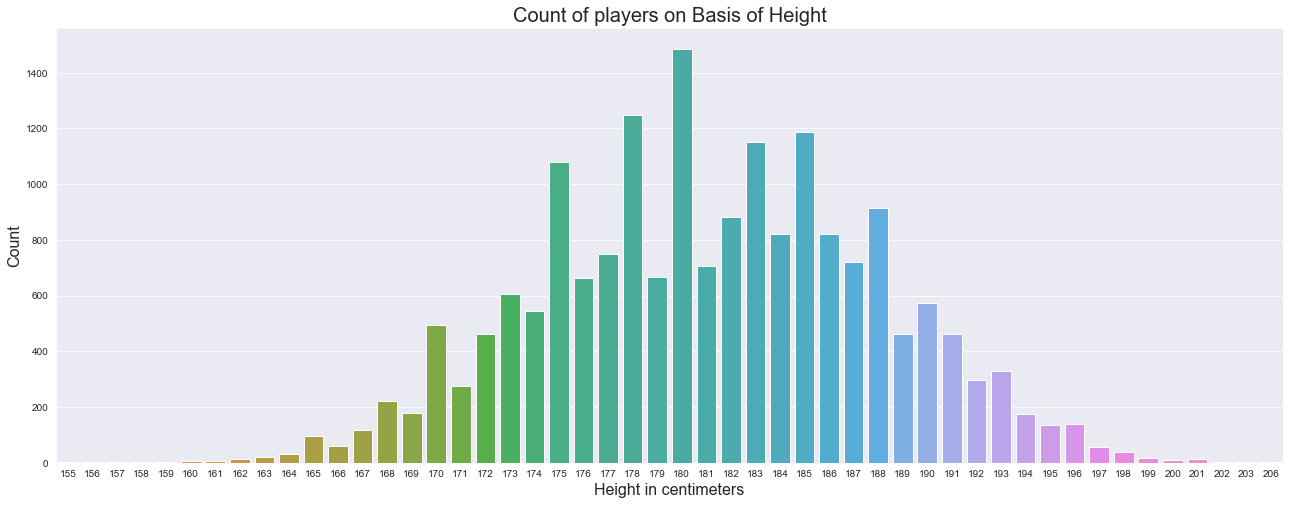

In [7]:
plt.figure(figsize = (22, 8))
ax = sns.countplot(x = 'height_cm', data = data)
ax.set_title(label = 'Count of players on Basis of Height', fontsize = 20)
ax.set_xlabel(xlabel = 'Height in centimeters', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

<AxesSubplot:title={'center':'Height vs Dribbling'}, xlabel='height_cm', ylabel='dribbling'>

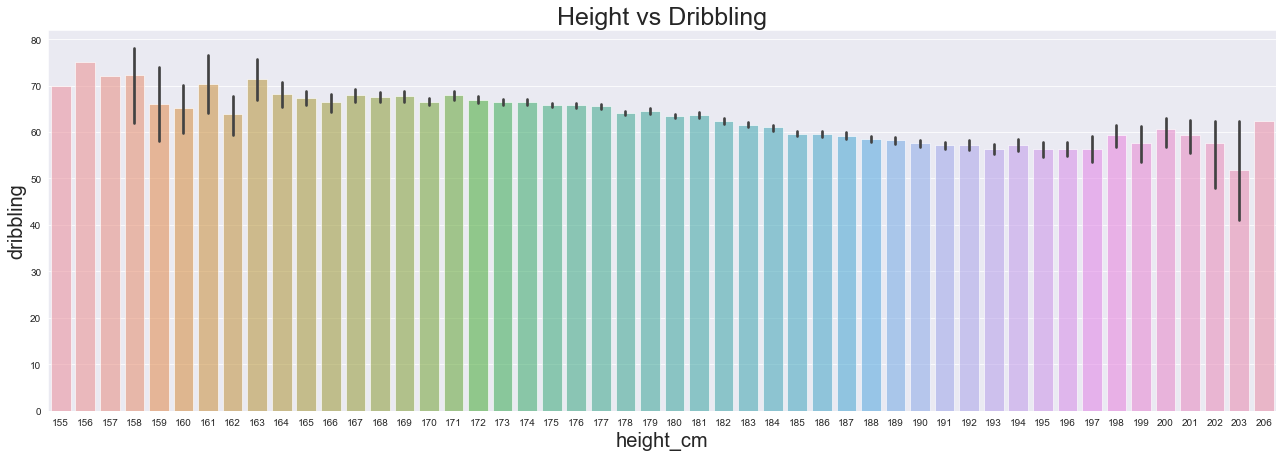

In [8]:
plt.figure(figsize = (22, 7))
plt.xlabel('Height', fontsize=20)
plt.ylabel('Dribbling', fontsize=20)
plt.title('Height vs Dribbling', fontsize = 25)
sns.barplot(x='height_cm', y='dribbling', data=data.sort_values('height_cm', inplace=False), alpha=0.6)

Conclusion : dribbling is not affected by height

<AxesSubplot:title={'center':'Height vs Movement Agility'}, xlabel='height_cm', ylabel='movement_agility'>

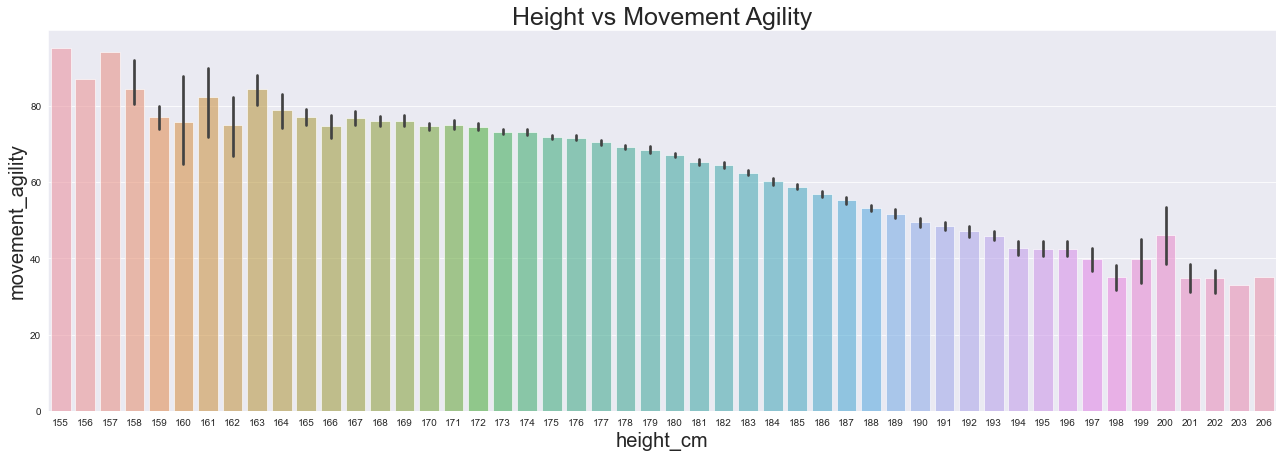

In [9]:
plt.figure(figsize = (22, 7))
plt.xlabel('Height', fontsize=20)
plt.ylabel('Movement Ability', fontsize=20)
plt.title('Height vs Movement Agility', fontsize = 25)
sns.barplot(x='height_cm', y='movement_agility', data=data.sort_values('height_cm', inplace=False), alpha=0.6)

On the other hand height does affect movement agility

<AxesSubplot:title={'center':'Weight vs Dribbling'}, xlabel='weight_kg', ylabel='dribbling'>

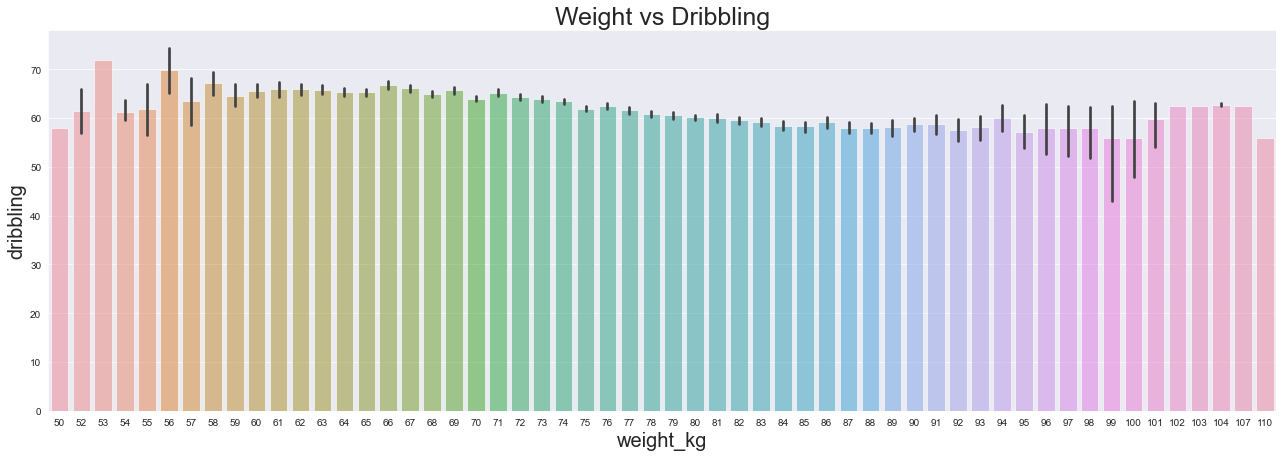

In [10]:
plt.figure(figsize = (22, 7))
plt.xlabel('Weight_kg', fontsize=20)
plt.ylabel('Dribbling', fontsize=20)
plt.title('Weight vs Dribbling', fontsize = 25)
sns.barplot(x='weight_kg', y='dribbling', data=data.sort_values('weight_kg'),alpha=0.6)

Conclusion : weight does not seem to affect driblling

<AxesSubplot:title={'center':'Weight vs acceleration'}, xlabel='weight_kg', ylabel='movement_acceleration'>

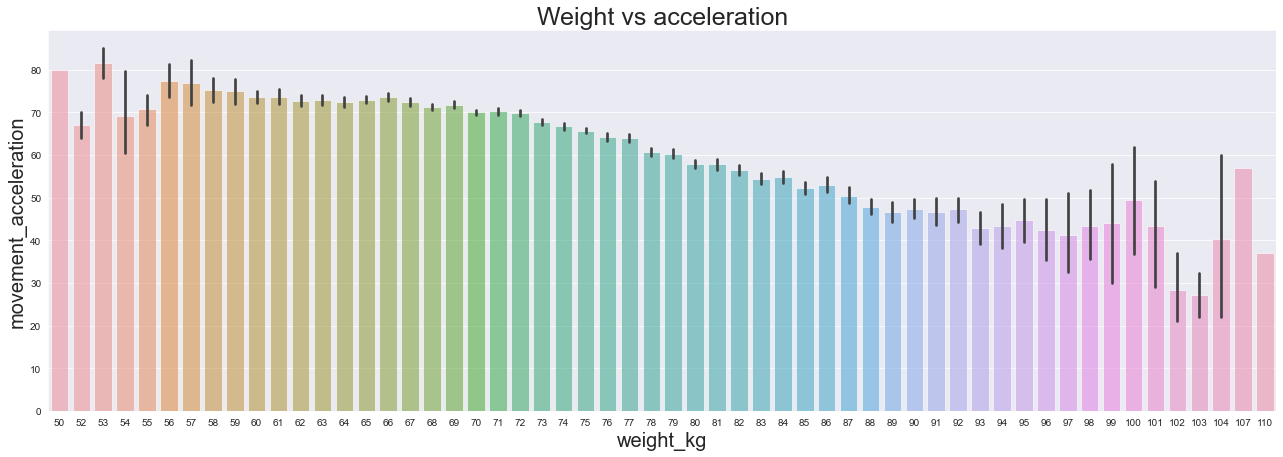

In [11]:
plt.figure(figsize = (22, 7))
plt.xlabel('Weight_kg', fontsize=20)
plt.ylabel('movement_acceleration', fontsize=20)
plt.title('Weight vs acceleration', fontsize = 25)
sns.barplot(x='weight_kg', y='movement_acceleration', data=data.sort_values('weight_kg'),alpha=0.6)

on the other hand, weight does affect acceleration

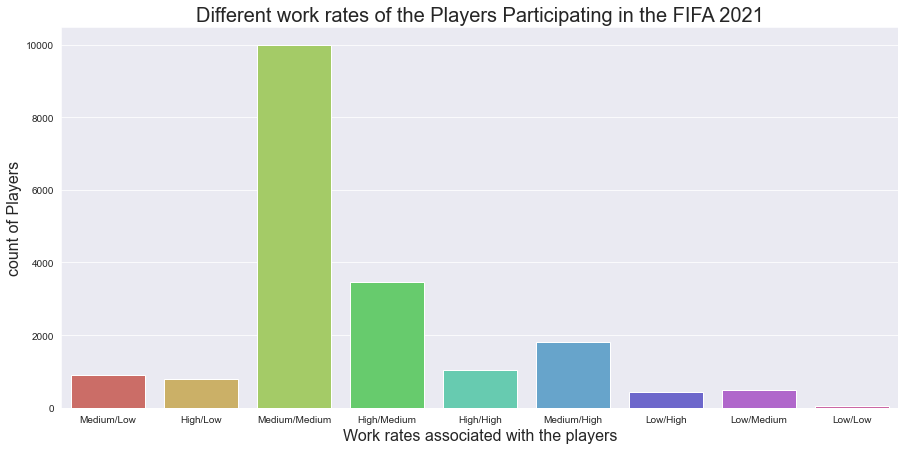

In [12]:
plt.figure(figsize = (15, 7))
sns.countplot(x = 'work_rate', data = data, palette = 'hls')
plt.title('Different work rates of the Players Participating in the FIFA 2021', fontsize = 20)
plt.xlabel('Work rates associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()

# Comparing Stats of Messi,Lewandowski & CR7

In [13]:
#data.columns
skills = ['pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots']

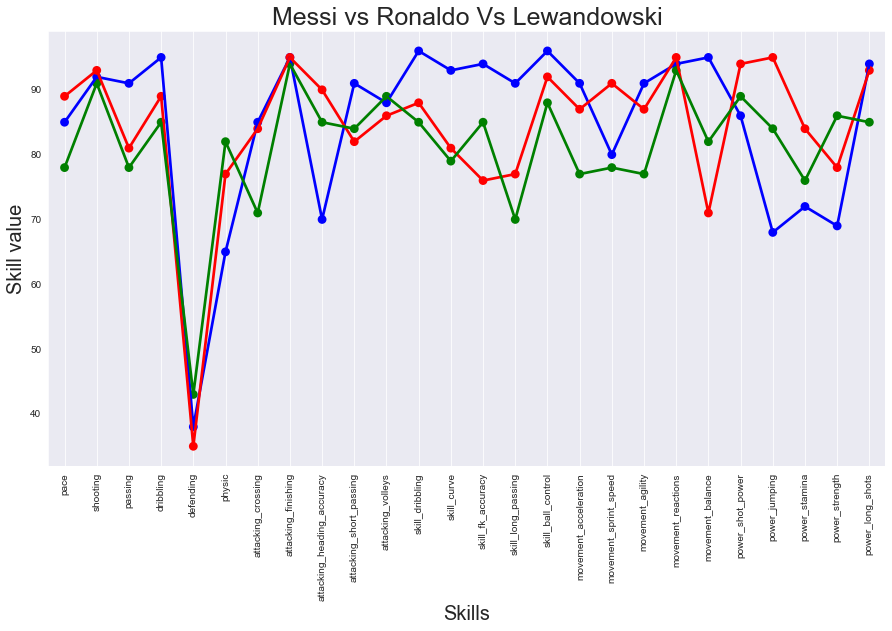

In [14]:
messi = data.loc[data['short_name'] == 'L. Messi']
messi = pd.DataFrame(messi, columns = skills)
ronaldo = data.loc[data['short_name'] == 'Cristiano Ronaldo']
ronaldo = pd.DataFrame(ronaldo, columns = skills)
lewandowski = data.loc[data['short_name'] == 'R. Lewandowski']
lewandowski = pd.DataFrame(lewandowski, columns = skills)


plt.figure(figsize=(15,8))
sns.pointplot(data=messi,color='blue',alpha=0.6)
sns.pointplot(data=ronaldo, color='red', alpha=0.6)
sns.pointplot(data=lewandowski, color='green', alpha=0.6)


plt.xticks(rotation=90)
plt.xlabel('Skills', fontsize=20)
plt.ylabel('Skill value', fontsize=20)
plt.title('Messi vs Ronaldo Vs Lewandowski', fontsize = 25)
plt.grid()

# Top 10 Players based on Overall skills


In [15]:
display(
    HTML(data.sort_values('overall', ascending=False)[['short_name', 'overall']][:10].to_html(index=False)
))

short_name,overall
L. Messi,93
Cristiano Ronaldo,92
J. Oblak,91
R. Lewandowski,91
Neymar Jr,91
K. De Bruyne,91
Alisson,90
S. Mané,90
M. Salah,90
V. van Dijk,90


# Age distribution of players in the clubs


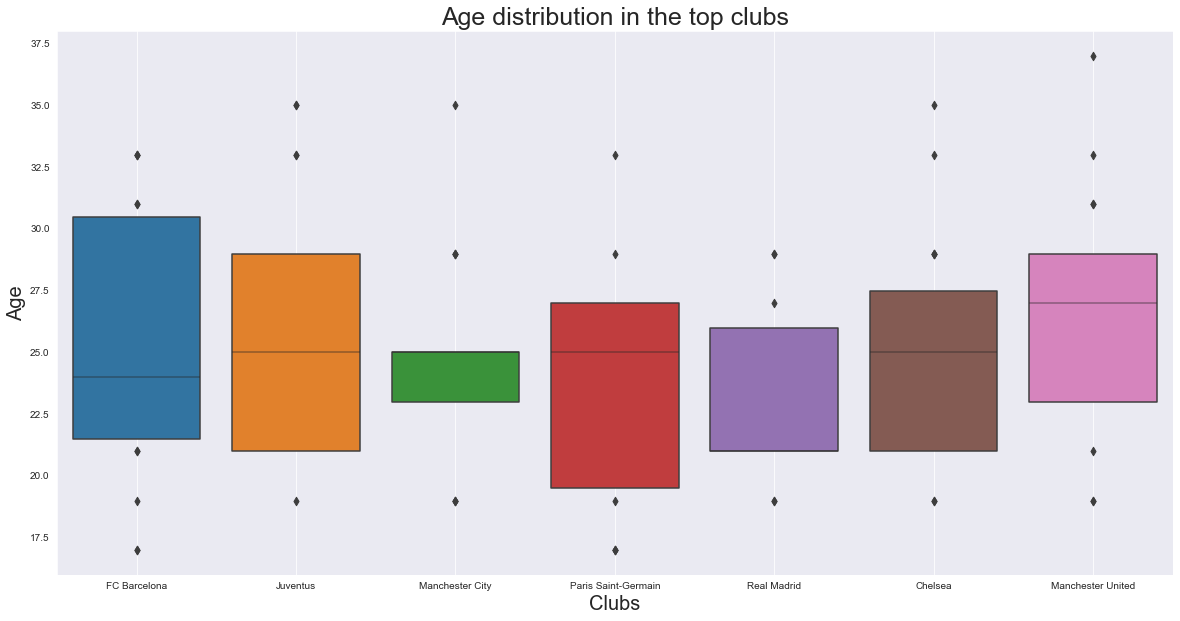

In [16]:
top_club_names = ('FC Barcelona','Real Madrid', 'Juventus', 'Paris Saint-Germain', 'Chelsea', 'Manchester City', 'Manchester United')
clubs = data.loc[data['club_name'].isin(top_club_names) & data['age']]
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax = sns.boxenplot(x="club_name", y="age", data=clubs)
ax.set_title(label='Age distribution in the top clubs', fontsize=25)
plt.xlabel('Clubs', fontsize=20)
plt.ylabel('Age', fontsize=20)
plt.grid()

Conclusion : we could deduce the strategy of each club through this chart. For instance PSG is clearly the one who is investing the most in its academy while Manchester City is clearlytaking only intiated player formthe age of 22.5 to 25 (at their prime)

# Age distribution of players in countries


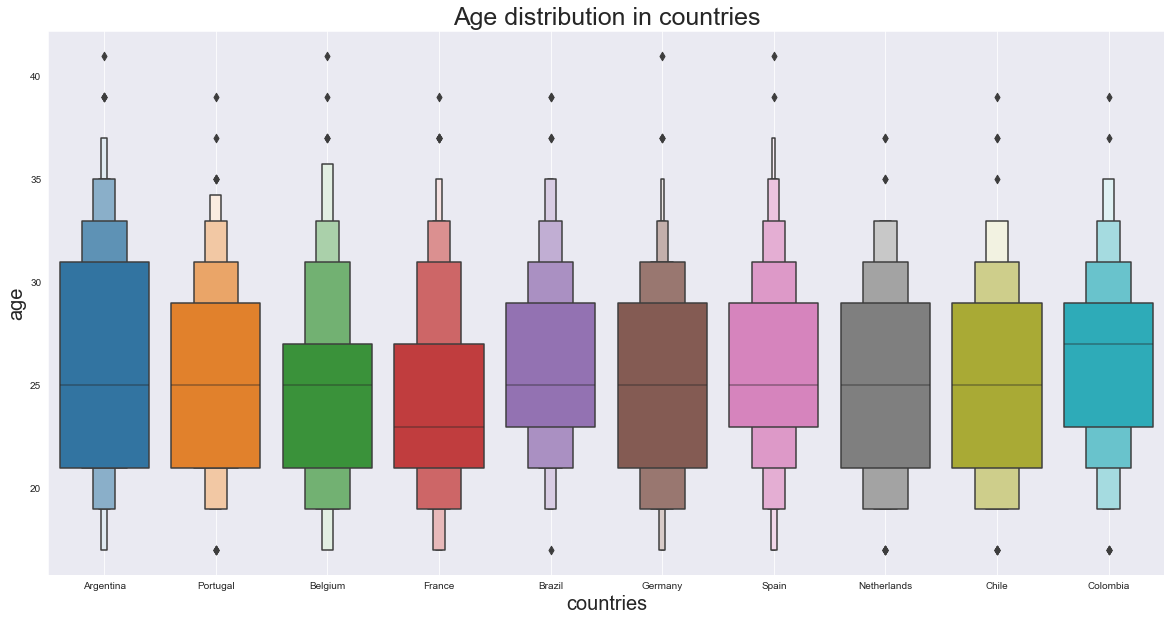

In [17]:
countries_names = ('France', 'Brazil', 'Germany', 'Belgium', 'Spain', 'Netherlands', 'Argentina', 'Portugal', 'Chile', 'Colombia')
countries = data.loc[data['nationality'].isin(countries_names) & data['age']]
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax = sns.boxenplot(x="nationality", y="age", data=countries)
ax.set_title(label='Age distribution in countries', fontsize=25)
plt.xlabel('countries', fontsize=20)
plt.ylabel('age', fontsize=20)
plt.grid()

As expected, the age distribution between countries is similar